In [ ]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [14]:
import matplotlib as mpl
mpl.rc('axes', titlesize=16, labelsize=16)
mpl.rc('lines', linewidth=2)
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 

In [15]:
path = '/home/traveller/Documents/Projekte/LensingBispectrum/CMB-nonlinear/folded_equilat/'

In [16]:
pb=[]
pb+=[pickle.load(open('postborn_phiphiphi.pkl','r'))]
pb+=[pickle.load(open('postborn_phiphig.pkl','r'))]

In [17]:
res={}
res['PB']={}
res['NL']={}

In [18]:
for tag in ['NL','PB']:
    res[tag]['ppp']={}
    res[tag]['ppg']={}

In [19]:
for tag in ['NL','PB']:
    for spec in ['ppp','ppg']:
        res[tag][spec]['folded']={}
        res[tag][spec]['equilat']={}

In [20]:
for tag in zip(['ppp','ppg'],[0,1]):
    res['PB'][tag[0]]['folded']['ls']=pb[tag[1]][4]
    res['PB'][tag[0]]['folded']['spec']=pb[tag[1]][5]
    res['PB'][tag[0]]['equilat']['ls']=pb[tag[1]][1]
    res['PB'][tag[0]]['equilat']['spec']=pb[tag[1]][2]

In [21]:
for tag in ['equilat','folded']:
    ell=pickle.load(open(path+'ell_%s_Lmin1_Lmax10000_lmax10000_lenL150_lenl150_lenang150_1e-04.pkl'%tag,'r'))
    L=np.asarray(ell[0::3])
    del ell
    for spec in ['ppp','ppg']:
        res['NL'][spec][tag]['ls']=L

In [22]:
for tag in zip(['equilat','folded'],[10001,5000]):
    spec = np.load(path+'bispec_phi_kkg_%sno_binning_lnPs_Bfit_Planck2015_TTlowPlensing_Lmin1-Lmax10001-lmax%s-lenBi250_sym.npy'%(tag[0],tag[1]))
    res['NL']['ppg'][tag[0]]['spec']=spec
    spec = np.load(path+'bispec_phi_%sno_binning_lnPs_Bfit_Planck2015_TTlowPlensing_Lmin1-Lmax10001-lmax%s-lenBi250_sym.npy'%(tag[0],tag[1]))
    res['NL']['ppp'][tag[0]]['spec']=spec

-c:20: RuntimeWarning: invalid value encountered in power
-c:21: RuntimeWarning: invalid value encountered in power
-c:23: RuntimeWarning: invalid value encountered in power
-c:24: RuntimeWarning: invalid value encountered in power
-c:39: RuntimeWarning: invalid value encountered in power
-c:40: RuntimeWarning: invalid value encountered in power


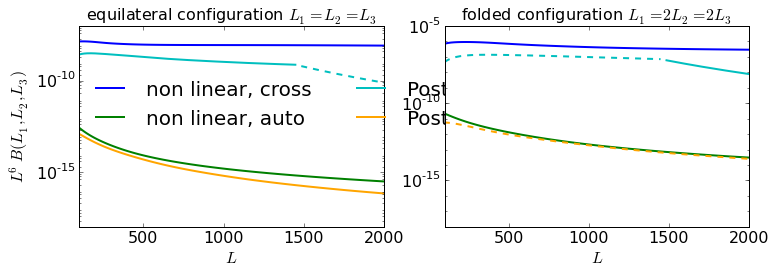

In [23]:
colors=['b','g','c','orange','c']
fig, axes = plt.subplots(1,2,figsize=(12,3.6), sharey=False, sharex=True)
config = 'equilat'
i=0
ax=axes[0]
for tag in ['NL','PB']:
    for tag2 in ['ppg','ppp']:
        if tag=='NL':
            key = 'non linear'
        else:
            key = 'Post Born'
        if tag2 =='ppp':
            key+=', auto'
        else:
            key+=', cross'
        L=res[tag][tag2][config]['ls']
        spec=res[tag][tag2][config]['spec']
        if tag2=='ppg':
            fac=1.
            ax.semilogy(L,L**6*spec*fac,color=colors[i],label=key)
            ax.plot(L,L**6*(-spec)*fac,color=colors[i], ls='--')
        else:
            ax.semilogy(L,L**6*spec,color=colors[i],label=key)
            ax.plot(L,L**6*(-spec),color=colors[i], ls='--')            
        i+=1
ax.set_ylim(1e-18,1e-7)
ax.set_yticks([1e-15,1e-10])
ax.set_title('equilateral configuration $L_1=L_2=L_3$')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$L^6 B(L_1,L_2,L_3)$')
ax.legend(loc=(0.01,0.45),ncol=2, frameon=False)
config = 'folded'
i=0
ax=axes[1]
for tag in ['NL','PB']:
    for tag2 in ['ppg','ppp']:
        L=res[tag][tag2][config]['ls']
        spec=res[tag][tag2][config]['spec']
        ax.semilogy(L,L**6*spec,color=colors[i],label=key)
        ax.plot(L,L**6*(-spec),color=colors[i], ls='--')
        i+=1
plt.xlim(100,2000)
ax.set_ylim(1e-18,1e-5)
ax.set_yticks([1e-15,1e-10,1e-5])
ax.set_title('folded configuration $L_1=2 L_2= 2 L_3$')
ax.set_xlabel(r'$L$')
plt.savefig('Bispectrum_PostBorn_vs_NonLinear.pdf')

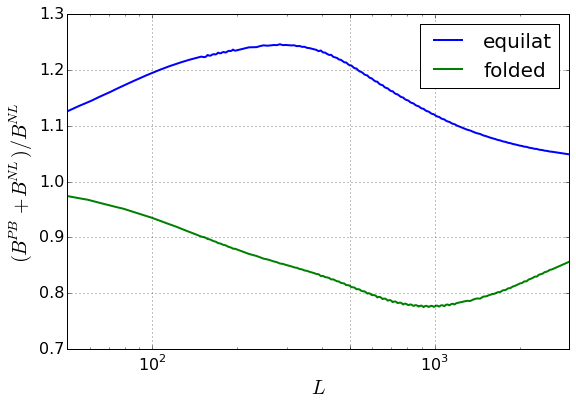

In [26]:
mpl.rc('axes', titlesize=20, labelsize=20)
mpl.rc('lines', linewidth=2)
mpl.rc('legend', fontsize=20)

colors=['b','g','c','orange','c']
fig, axes = plt.subplots(1,1,figsize=(9,6))
for config in ['equilat','folded']:
    ax=axes
    spec_NL=res['NL']['ppg'][config]['spec']
    spec_PB=res['PB']['ppg'][config]['spec']
    L=res['PB']['ppg'][config]['ls']
    Ls=res['NL']['ppg'][config]['ls']
    spec_NL=np.interp(L,Ls,spec_NL)
    ax.semilogx(L,(spec_PB+spec_NL)/spec_NL,label=config)
    ax.set_xlabel(r'$L$')
    ax.set_ylabel(r'$(B^{PB}+B^{NL})/B^{NL}$')
plt.xlim(50,3000)
plt.xticks([50,100,500,1000,3000])
plt.grid()
plt.legend(loc='best',frameon=True)
plt.savefig('PostBorn_Corrections_to_NonLinear_Bispec.pdf')